<a href="https://colab.research.google.com/github/KimMendoza310/Comparativa-de-Rendimiento-4G-vs-5G/blob/main/Comparativa_de_Rendimiento_4G_vs_5G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Comparativa de Rendimiento 4G vs 5G**
**Evaluar la latencia, throughput, y capacidad de usuarios simultáneos en una red simulada.**

**Cálculos prácticos:**

**Comparar capacidades de celdas**


Métricas adicionales para 4000 usuarios:
Eficiencia espectral 4G: 82124.12 bps/Hz
Eficiencia espectral 5G: 821241.21 bps/Hz
Capacidad total de la celda 4G: 6569.93 Mbps
Capacidad total de la celda 5G: 65699.30 Mbps
Desempeño de la red por usuario 4G: 1.64 Mbps
Desempeño de la red por usuario 5G: 16.42 Mbps
Capacidad del canal 4G: 1642482422794.13 bps
Capacidad del canal 5G: 16424824227941.27 bps


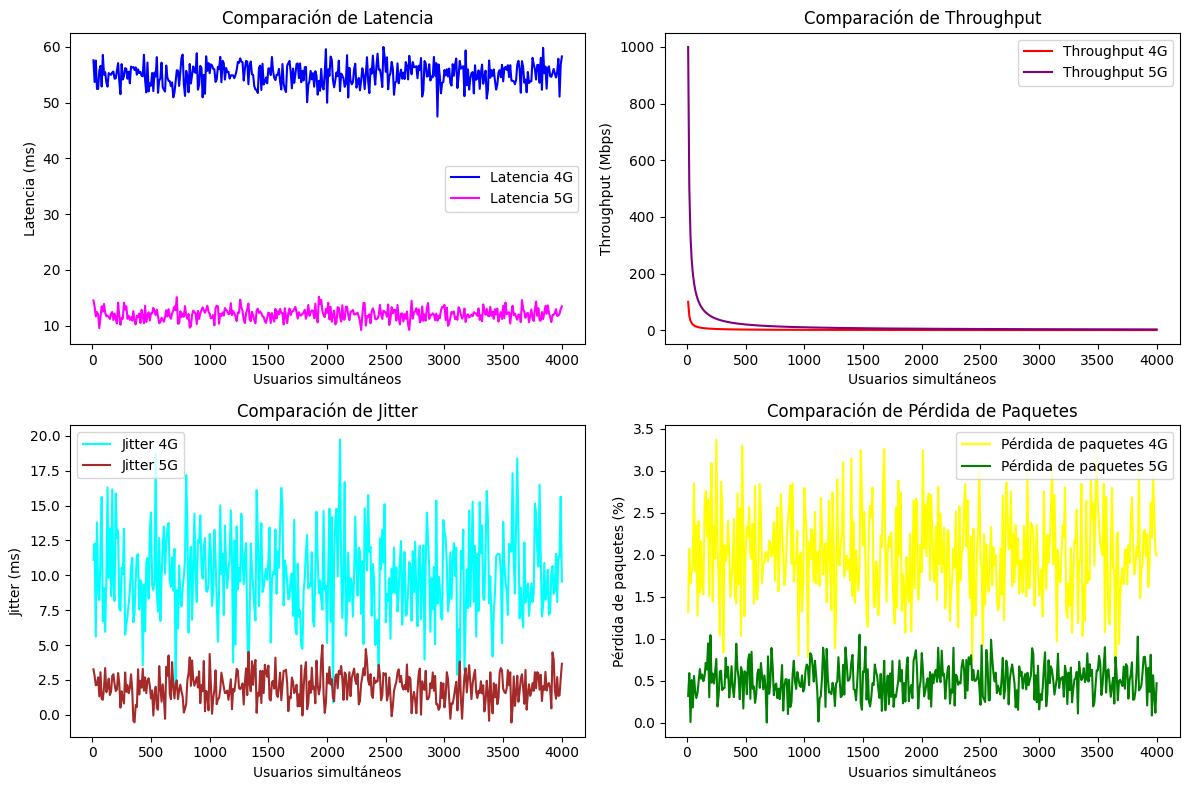

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación
num_users = np.arange(10, 4001, 10)  # Número de usuarios simultáneos

latency_4g = 50 + np.random.normal(5, 2, len(num_users))  # Latencia en ms (4G)
latency_5g = 10 + np.random.normal(2, 1, len(num_users))  # Latencia en ms (5G)
throughput_4g = 100 / (num_users / 10)  # Mbps compartidos
throughput_5g = 1000 / (num_users / 10)  # Mbps compartidos

# Métricas adicionales
jitter_4g = np.random.normal(10, 3, len(num_users))  # Variación en latencia (ms)
jitter_5g = np.random.normal(2, 1, len(num_users))
packet_loss_4g = np.clip(np.random.normal(2, 0.5, len(num_users)), 0, 5)  # Pérdida de paquetes (%)
packet_loss_5g = np.clip(np.random.normal(0.5, 0.2, len(num_users)), 0, 2)

# Capacidad de usuarios en la celda (suponiendo BW y espectro limitado)
capacidad_4g = 2000 / (latency_4g * np.log2(1 + 15))
capacidad_5g = 5000 / (latency_5g * np.log2(1 + 50))

# Ancho de banda disponible en la celda (en MHz)
ancho_banda = 20  # 20 MHz de ancho de banda por celda

# Cálculo de la eficiencia espectral (en bps/Hz)
eficiencia_espectral_4g = np.mean(throughput_4g) * 1e6 / ancho_banda  # Convertir Mbps a bps
eficiencia_espectral_5g = np.mean(throughput_5g) * 1e6 / ancho_banda  # Convertir Mbps a bps

# Capacidad del canal (en bps)
capacidad_canal_4g = eficiencia_espectral_4g * ancho_banda * 1e6  # bps (20 MHz)
capacidad_canal_5g = eficiencia_espectral_5g * ancho_banda * 1e6  # bps (20 MHz)

# Capacidad total de la celda considerando 4000 usuarios
capacidad_total_4g = np.mean(throughput_4g) * num_users[-1]  # Mbps por usuario * número de usuarios
capacidad_total_5g = np.mean(throughput_5g) * num_users[-1]  # Mbps por usuario * número de usuarios

# Desempeño de la red por usuario (considerando throughput)
desempeno_4g_por_usuario = np.mean(throughput_4g)
desempeno_5g_por_usuario = np.mean(throughput_5g)

# Mostrar las métricas
print("Métricas adicionales para 4000 usuarios:")
print(f"Eficiencia espectral 4G: {eficiencia_espectral_4g:.2f} bps/Hz")
print(f"Eficiencia espectral 5G: {eficiencia_espectral_5g:.2f} bps/Hz")
print(f"Capacidad total de la celda 4G: {capacidad_total_4g:.2f} Mbps")
print(f"Capacidad total de la celda 5G: {capacidad_total_5g:.2f} Mbps")
print(f"Desempeño de la red por usuario 4G: {desempeno_4g_por_usuario:.2f} Mbps")
print(f"Desempeño de la red por usuario 5G: {desempeno_5g_por_usuario:.2f} Mbps")
print(f"Capacidad del canal 4G: {capacidad_canal_4g:.2f} bps")
print(f"Capacidad del canal 5G: {capacidad_canal_5g:.2f} bps")

# Gráficos de comparación
plt.figure(figsize=(12, 8))

# Latencia
plt.subplot(2, 2, 1)
plt.plot(num_users, latency_4g, label='Latencia 4G', color='blue')
plt.plot(num_users, latency_5g, label='Latencia 5G', color='magenta')
plt.xlabel('Usuarios simultáneos')
plt.ylabel('Latencia (ms)')
plt.legend()
plt.title('Comparación de Latencia')

# Throughput
plt.subplot(2, 2, 2)
plt.plot(num_users, throughput_4g, label='Throughput 4G', color='red')
plt.plot(num_users, throughput_5g, label='Throughput 5G', color='purple')
plt.xlabel('Usuarios simultáneos')
plt.ylabel('Throughput (Mbps)')
plt.legend()
plt.title('Comparación de Throughput')

# Jitter
plt.subplot(2, 2, 3)
plt.plot(num_users, jitter_4g, label='Jitter 4G', color='cyan')
plt.plot(num_users, jitter_5g, label='Jitter 5G', color='brown')
plt.xlabel('Usuarios simultáneos')
plt.ylabel('Jitter (ms)')
plt.legend()
plt.title('Comparación de Jitter')

# Pérdida de paquetes
plt.subplot(2, 2, 4)
plt.plot(num_users, packet_loss_4g, label='Pérdida de paquetes 4G', color='yellow')
plt.plot(num_users, packet_loss_5g, label='Pérdida de paquetes 5G', color='green')
plt.xlabel('Usuarios simultáneos')
plt.ylabel('Pérdida de paquetes (%)')
plt.legend()
plt.title('Comparación de Pérdida de Paquetes')

plt.tight_layout()
plt.show()
